# Let's Start

Problem :  What is the best strategy when the sale getting down ? 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
#display maximum column and rows
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [6]:
#read the data from csv file
df = pd.read_excel("hands_on.xlsx", sheet_name='Sheet1')

In [7]:
df.head()

,id_event,invoice_date,Sold,Transaction,event_start_date,event_end_date,status_event,Ratio
0,5016,2018-09-10,2555,2555.0,2018-12-09,2018-12-09,Past Event,0.174224
1,5016,2018-09-11,2308,2308.0,2018-12-09,2018-12-09,Past Event,0.157382
2,5016,2018-09-12,1328,780.0,2018-12-09,2018-12-09,Past Event,0.090556
3,5016,2018-09-13,1290,306.0,2018-12-09,2018-12-09,Past Event,0.087965
4,5016,2018-09-14,1176,204.0,2018-12-09,2018-12-09,Past Event,0.080191


In [8]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
id_event            210 non-null int64
invoice_date        210 non-null datetime64[ns]
Sold                210 non-null int64
Transaction         210 non-null float64
event_start_date    210 non-null datetime64[ns]
event_end_date      210 non-null datetime64[ns]
status_event        210 non-null object
Ratio               210 non-null float64
dtypes: datetime64[ns](3), float64(2), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
#check categorical type
df.groupby('status_event')['id_event'].unique()

status_event
Active Event          [21450]
Past Event      [5016, 11179]
Name: id_event, dtype: object

In [10]:
# Extract event needed
event_A = df[df.id_event == 5016].reset_index()
event_B = df[df.id_event == 11179].reset_index()
event_C = df[df.id_event == 21450].reset_index()

Text(0, 0.5, 'Ratio')

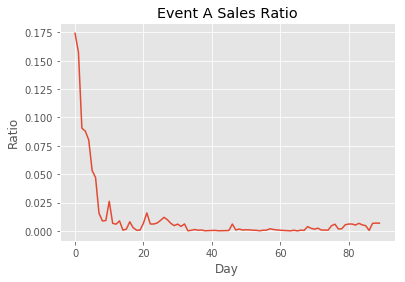

In [11]:
event_A.Ratio.plot.line(title='Event A Sales Ratio')
plt.xlabel('Day')
plt.ylabel('Ratio')

Text(0, 0.5, 'Ratio')

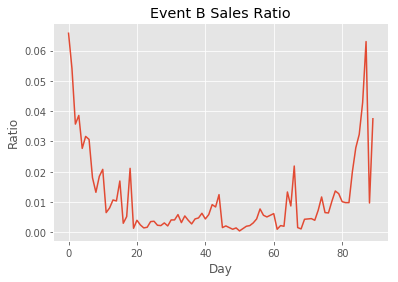

In [12]:
event_B.Ratio.plot.line(title='Event B Sales Ratio')
plt.xlabel('Day')
plt.ylabel('Ratio')

Text(0, 0.5, 'Ratio')

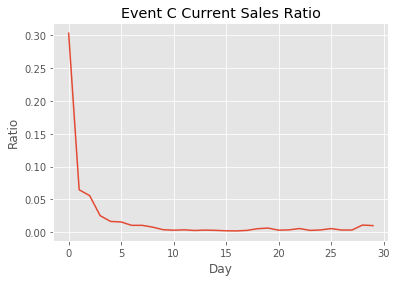

In [13]:
event_C.Ratio.plot.line(title='Event C Current Sales Ratio' )
plt.xlabel('Day')
plt.ylabel('Ratio')

### How we can gain the insight ?
Take a look back, objective from insight is to make a action plan

In [14]:
event_C['invoice_date'] = pd.to_datetime(event_C['invoice_date']).dt.date
event_C['event_start_date'] = pd.to_datetime(event_C['event_start_date']).dt.date
event_C['event_end_date'] = pd.to_datetime(event_C['event_end_date']).dt.date

Text(0, 0.5, 'Ratio')

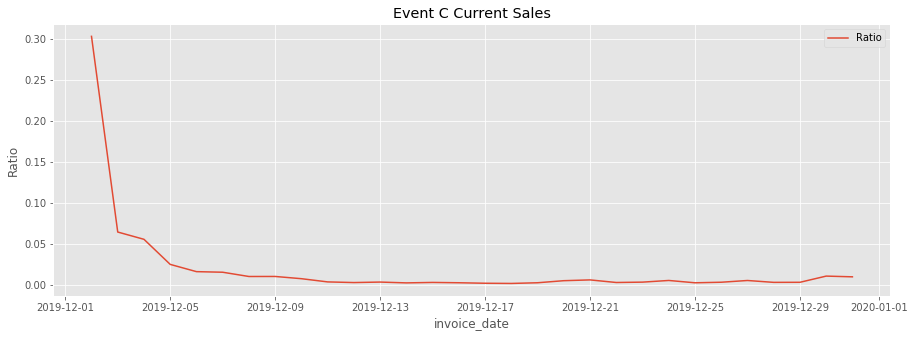

In [40]:
# let's take a look at the sales
event_C.plot.line('invoice_date', 'Ratio', figsize=(15,5), title='Event C Current Sales' )
plt.ylabel('Ratio')

In [16]:
event_C.event_end_date.nunique()

1

In [17]:
print('start event date =', event_C.event_start_date[0])
print('start end date =', event_C.event_end_date[0])

start event date = 2020-06-27
start end date = 2020-06-27


we still have 5 months for promotion. what should we do? <br>
don't worries ! <br>
let's make strategies plan based on data.

In [38]:
event_C.Sold.sum() 
# 14.948 of 25.000 tickets sold (59%).
# 10.052 left

14948

In [27]:
event_C.Sold.mean()

498.26666666666665

In [54]:
event_C.head(10)

,index,id_event,invoice_date,Sold,Transaction,event_start_date,event_end_date,status_event,Ratio,invoice_day,invoice_weeekday
0,180,21450,2019-12-02,7584,3467.0,2020-06-27,2020-06-27,Active Event,0.30336,0,Monday
1,181,21450,2019-12-03,1616,766.0,2020-06-27,2020-06-27,Active Event,0.06464,1,Tuesday
2,182,21450,2019-12-04,1394,702.0,2020-06-27,2020-06-27,Active Event,0.05576,2,Wednesday
3,183,21450,2019-12-05,629,321.0,2020-06-27,2020-06-27,Active Event,0.02516,3,Thursday
4,184,21450,2019-12-06,408,206.0,2020-06-27,2020-06-27,Active Event,0.01632,4,Friday
5,185,21450,2019-12-07,390,197.0,2020-06-27,2020-06-27,Active Event,0.01560,5,Saturday
6,186,21450,2019-12-08,260,138.0,2020-06-27,2020-06-27,Active Event,0.01040,6,Sunday
7,187,21450,2019-12-09,261,122.0,2020-06-27,2020-06-27,Active Event,0.01044,0,Monday
8,188,21450,2019-12-10,193,97.0,2020-06-27,2020-06-27,Active Event,0.00772,1,Tuesday
9,189,21450,2019-12-11,95,44.0,2020-06-27,2020-06-27,Active Event,0.00380,2,Wednesday


In [43]:
event_C[4:].Sold.mean()

143.26923076923077

In [44]:
event_C.Sold.median()

113.5

Oke. make assumption maximum 114 tickets sold per day. <br>
But we have extremely drop month on Ramadhan :(

In [46]:
114*30*3

10260

In [47]:
#that's not the secure number. Need check traffic day

In [48]:
event_C['invoice_day'] = pd.to_datetime(event_C['invoice_date']).dt.weekday

In [49]:
event_C['invoice_weeekday'] = event_C.invoice_day.replace({0: 'Monday', 
                                                           1: 'Tuesday', 
                                                           2: 'Wednesday', 
                                                           3: 'Thursday', 
                                                           4: 'Friday', 
                                                           5: 'Saturday', 
                                                           6: 'Sunday'})

In [50]:
event_C.groupby(['invoice_weeekday'])['Transaction'].sum()

invoice_weeekday
Friday        381.0
Monday       3806.0
Saturday      362.0
Sunday        255.0
Thursday      421.0
Tuesday      1135.0
Wednesday     811.0
Name: Transaction, dtype: float64

Text(0, 0.5, 'days')

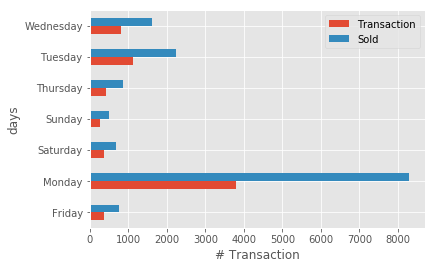

In [51]:
event_C.groupby(['invoice_weeekday'])[['Transaction','Sold']].sum().plot.barh()
plt.xlabel('# Transaction')
plt.ylabel('days')

Text(0, 0.5, 'days')

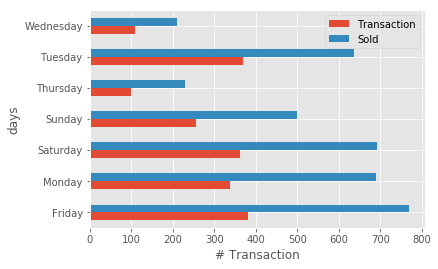

In [52]:
event_C[4:].groupby(['invoice_weeekday'])[['Transaction','Sold']].sum().plot.barh()
plt.xlabel('# Transaction')
plt.ylabel('days')

In [55]:
week = event_C[4:].groupby(['invoice_weeekday'])[['Transaction','Sold']].sum()

In [56]:
week

,Transaction,Sold
invoice_weeekday,,
Friday,381.0,768
Monday,339.0,690
Saturday,362.0,692
Sunday,255.0,499
Thursday,100.0,229
Tuesday,369.0,636
Wednesday,109.0,211


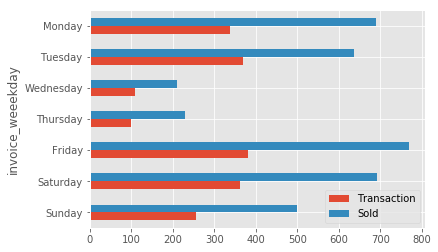

In [57]:
week.reindex(index = ['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday']).plot.barh()

### Information : 
1. 5 months left befor D-Day
2. 14.948 of 25.000 tickets sold (59%) 
3. Reach average 114 tickets per day
4. The traffic of transaction peak on Friday
5. 2 tickets sold on once transactions
6. If constan selling +- 114 ticket/day till end, ticket will be sold out.

### Insight and action plan
1. More intensified publication and announcement on Thursday, 12-14 PM and 19-21 PM
2. Ramadhan need to make some publication plan again
3. We can implement promo using bundle 2 tickets 